In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('hotel_bookings_data.csv')

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,3,No Deposit,NaN,NaN,0,Personal,0.00,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,4,No Deposit,NaN,NaN,0,Personal,0.00,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,NaN,NaN,0,Personal,75.00,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,0,No Deposit,304.0,NaN,0,Personal,75.00,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0.0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,NaN,0,Personal,98.00,0,1,Check-Out
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2019,October,35,30,2,5,2,0.0,0,Breakfast,Kabupaten Magelang,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,394.0,NaN,0,Personal,96.14,0,0,Check-Out
119386,City Hotel,0,102,2019,October,35,31,2,5,3,0.0,0,Breakfast,Kota Yogyakarta,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,NaN,0,Personal,225.43,0,2,Check-Out
119387,City Hotel,0,34,2019,October,35,31,2,5,2,0.0,0,Breakfast,Kabupaten Bandung,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,NaN,0,Personal,157.71,0,4,Check-Out
119388,City Hotel,0,109,2019,October,35,31,2,5,2,0.0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,89.0,NaN,0,Personal,104.40,0,0,Check-Out


#Tugas 1

In [ ]:
df.info()

In [ ]:
df.duplicated().sum()

33261

In [ ]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_weekdays_nights               0
adults                                 0
children                               4
babies                                 0
meal                                   0
city                                 488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type   

In [ ]:
df.shape

(119390, 29)

In [ ]:
#drop duplicate
df_after_drop_duplicate = df.drop_duplicates().reset_index(drop=True)

In [ ]:
df_after_drop_duplicate.shape

(86129, 29)

In [ ]:
for column_name in df.columns:
    unique_values = df[column_name].unique()
    print(f"Unique values in column '{column_name}': {unique_values}")

Unique values in column 'hotel': ['Resort Hotel' 'City Hotel']
Unique values in column 'is_canceled': [0 1]
Unique values in column 'lead_time': [342 737   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78
  48  60  77  99 118  95  96  69  45  40  15  36  43  70  16 107  47 113
  90  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81 368 364
 324  79  21 109 102   4  98  92  26  73 115  86  52  29  30  33  32   8
 100  44  80  97  64  39  34  27  82  94 110 111  84  66 104  28 258 112
  65  67  55  88  54 292  83 105 280 394  24 103 366 249  22  91  11 108
 106  31  87  41 304 117  59  53  58 116  42 321  38  56  49 317   6  57
  19  25 315 123  46  89  61 312 299 130  74 298 119  20 286 136 129 124
 327 131 460 140 114 139 122 137 126 120 128 135 150 143 151 132 125 157
 147 138 156 164 346 159 160 161 333 381 149 154 297 163 314 155 323 340
 356 142 328 144 336 248 302 175 344 382 146 170 166 338 167 310 148 165
 172 171 145 121 178 305 173 152 354 347 158 185 349

In [ ]:
#Missing value pada company, agent dan children diisi dengan '0'.
# 0 artinya tidak berasal dari perusahaan, tidak melalui traveling agent dan tidak memiliki anak
df_after_drop_duplicate['company'] = df_after_drop_duplicate['company'].fillna(0)
df_after_drop_duplicate['agent'] = df_after_drop_duplicate['agent'].fillna(0)
df_after_drop_duplicate['children'] = df_after_drop_duplicate['children'].fillna(0)
df_after_drop_duplicate['city'] = df_after_drop_duplicate['children'].fillna('Unknown')


In [ ]:
df_after_drop_duplicate.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_weekdays_nights          0
adults                            0
children                          0
babies                            0
meal                              0
city                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [ ]:
df_after_drop_duplicate['meal'] = df_after_drop_duplicate['meal'].replace(['Undefined'],'No Meal')

In [ ]:
df_after_drop_duplicate['meal'].unique()

array(['Breakfast', 'Full Board', 'Dinner', 'No Meal'], dtype=object)

In [ ]:
#Drop data yang tidak diperlukan (Jika total guest = 0 dan total duration = 0)
#Kolom Adults,Children dan babies di gabung menjadi 1 kolom 'Total Guest'
#Kolom stays in weekend night dan stays in weekdays night digabung menjadi stay_duration

df_after_drop_duplicate['Total_Guest'] = df_after_drop_duplicate['adults']  + df_after_drop_duplicate['children'] + df_after_drop_duplicate['babies']
df_after_drop_duplicate['stay_duration'] = df_after_drop_duplicate['stays_in_weekend_nights']  + df_after_drop_duplicate['stays_in_weekdays_nights']

df_used = df_after_drop_duplicate[(df_after_drop_duplicate['Total_Guest']>0) & (df_after_drop_duplicate['stay_duration']>0)                    ]

In [ ]:
df_used

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,Total_Guest,stay_duration
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,0.0,0,Breakfast,0.0,Direct,Direct,0,0,0,0,No Deposit,0.0,0.0,0,Personal,75.00,0,0,Check-Out,1.0,1
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0.0,0,Breakfast,0.0,Corporate,Corporate,0,0,0,0,No Deposit,304.0,0.0,0,Personal,75.00,0,0,Check-Out,1.0,1
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0.0,0,Breakfast,0.0,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,0.0,0,Personal,98.00,0,1,Check-Out,2.0,2
5,Resort Hotel,0,0,2017,September,27,1,0,2,2,0.0,0,Breakfast,0.0,Direct,Direct,0,0,0,0,No Deposit,0.0,0.0,0,Personal,107.00,0,0,Check-Out,2.0,2
6,Resort Hotel,0,9,2017,September,27,1,0,2,2,0.0,0,Full Board,0.0,Direct,Direct,0,0,0,0,No Deposit,303.0,0.0,0,Personal,103.00,0,1,Check-Out,2.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86124,City Hotel,0,23,2019,October,35,30,2,5,2,0.0,0,Breakfast,0.0,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,394.0,0.0,0,Personal,96.14,0,0,Check-Out,2.0,7
86125,City Hotel,0,102,2019,October,35,31,2,5,3,0.0,0,Breakfast,0.0,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,0.0,0,Personal,225.43,0,2,Check-Out,3.0,7
86126,City Hotel,0,34,2019,October,35,31,2,5,2,0.0,0,Breakfast,0.0,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,0.0,0,Personal,157.71,0,4,Check-Out,2.0,7
86127,City Hotel,0,109,2019,October,35,31,2,5,2,0.0,0,Breakfast,0.0,Online TA,TA/TO,0,0,0,0,No Deposit,89.0,0.0,0,Personal,104.40,0,0,Check-Out,2.0,7


In [ ]:
df_used.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85378 entries, 2 to 86128
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           85378 non-null  object 
 1   is_canceled                     85378 non-null  int64  
 2   lead_time                       85378 non-null  int64  
 3   arrival_date_year               85378 non-null  int64  
 4   arrival_date_month              85378 non-null  object 
 5   arrival_date_week_number        85378 non-null  int64  
 6   arrival_date_day_of_month       85378 non-null  int64  
 7   stays_in_weekend_nights         85378 non-null  int64  
 8   stays_in_weekdays_nights        85378 non-null  int64  
 9   adults                          85378 non-null  int64  
 10  children                        85378 non-null  float64
 11  babies                          85378 non-null  int64  
 12  meal                            

In [ ]:
df_used['children'] = df_used['children'].astype(int)
df_used['Total_Guest'] = df_used['Total_Guest'].astype(int)

<ipython-input-37-1ac85124099f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_used['children'] = df_used['children'].astype(int)
<ipython-input-37-1ac85124099f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_used['Total_Guest'] = df_used['Total_Guest'].astype(int)


#Tugas 2

In [ ]:
df_used.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85378 entries, 2 to 86128
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           85378 non-null  object 
 1   is_canceled                     85378 non-null  int64  
 2   lead_time                       85378 non-null  int64  
 3   arrival_date_year               85378 non-null  int64  
 4   arrival_date_month              85378 non-null  object 
 5   arrival_date_week_number        85378 non-null  int64  
 6   arrival_date_day_of_month       85378 non-null  int64  
 7   stays_in_weekend_nights         85378 non-null  int64  
 8   stays_in_weekdays_nights        85378 non-null  int64  
 9   adults                          85378 non-null  int64  
 10  children                        85378 non-null  int64  
 11  babies                          85378 non-null  int64  
 12  meal                            

In [ ]:
df_used.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,Total_Guest,stay_duration
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,0,0,Breakfast,0.0,Direct,Direct,0,0,0,0,No Deposit,0.0,0.0,0,Personal,75.0,0,0,Check-Out,1,1
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0,0,Breakfast,0.0,Corporate,Corporate,0,0,0,0,No Deposit,304.0,0.0,0,Personal,75.0,0,0,Check-Out,1,1
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0,0,Breakfast,0.0,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,0.0,0,Personal,98.0,0,1,Check-Out,2,2
5,Resort Hotel,0,0,2017,September,27,1,0,2,2,0,0,Breakfast,0.0,Direct,Direct,0,0,0,0,No Deposit,0.0,0.0,0,Personal,107.0,0,0,Check-Out,2,2
6,Resort Hotel,0,9,2017,September,27,1,0,2,2,0,0,Full Board,0.0,Direct,Direct,0,0,0,0,No Deposit,303.0,0.0,0,Personal,103.0,0,1,Check-Out,2,2


In [ ]:
df_used["arrival_month_num"] = pd.to_datetime(df_used['arrival_date_month'],format='%B').dt.month

<ipython-input-47-3603190af082>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_used["arrival_month_num"] = pd.to_datetime(df_used['arrival_date_month'],format='%B').dt.month


In [ ]:
df_used["arrival_month_num"].unique()

array([ 9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8])

In [ ]:
df_used_group = df_used.groupby(["hotel","arrival_date_month","arrival_month_num","arrival_date_year"]).agg({"hotel":"count"}).rename(columns={"hotel":"total_booking"}).reset_index()


In [ ]:
df_used_group.sort_values(by=["hotel","arrival_month_num","arrival_date_month","arrival_date_year"],inplace=True)
df_used_group.drop("arrival_month_num",axis=1,inplace=True)

In [ ]:
df_used_group.set_index(["hotel","arrival_date_month","arrival_date_year"])

total_booking
hotel        arrival_date_month arrival_date_year               
City Hotel   January            2017                         753
                                2018                        2096
             February           2017                         988
                                2018                        1964
             March              2018                        1004
                                2019                        1670
             April              2018                        1608
                                2019                        1906
             May                2018                        2340
                                2019                        2437
             June               2018                        2376
                                2019                        2641
             July               2018                        2290
                                2019                        3031
             August             2018                        2215
                                2019                        2693
             September          2017                         370
                                2018                        2447
                                2019                        2840
             October            2017                        1051
                                2018                        2774
                                2019                        2648
             November           2017                        1531
                                2018                        2509
             December           2017                        1439
                                2018                        2570
Resort Hotel January            2017                         831
                                2018                        1164
             February           2017                         923
                                2018                        1121
             March              2018                         798
                                2019                        1106
             April              2018                        1124
                                2019                        1329
             May                2018                        1419
                                2019                        1166
             June               2018                        1313
                                2019                        1443
             July               2018                        1374
                                2019                        1489
             August             2018                        1197
                                2019                        1508
             September          2017                        1258
                                2018                        1349
                                2019                        1656
             October            2017                        1329
                                2018                        1585
                                2019                        1701
             November           2017                        1132
                                2018                        1254
             December           2017                        1090
                                2018                        1528

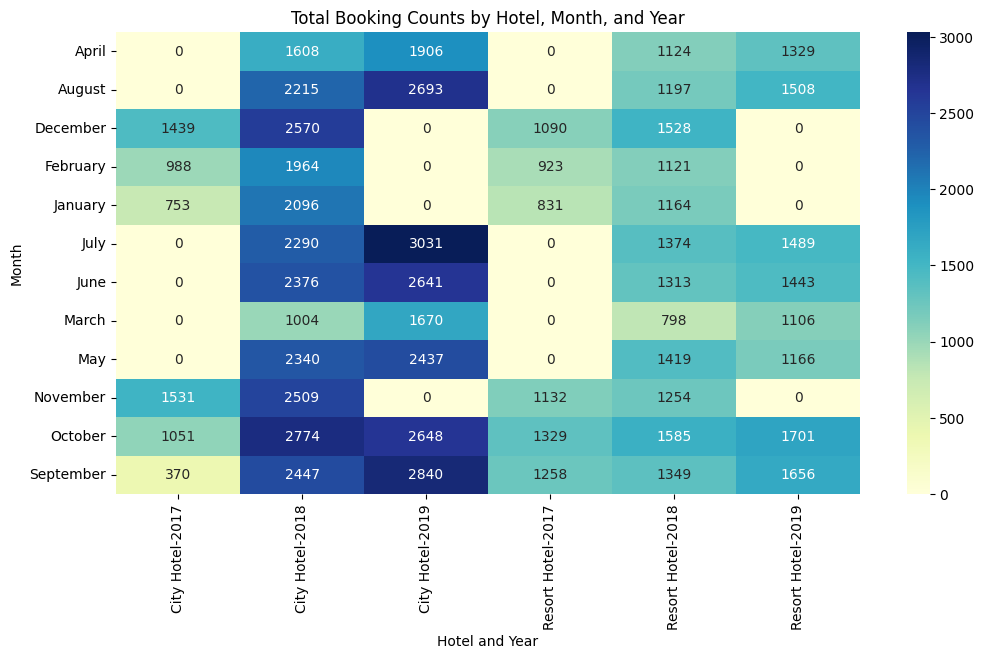

In [ ]:
pivot_df = df_used_group.pivot_table(index='arrival_date_month', columns=['hotel', 'arrival_date_year'], values='total_booking', fill_value=0)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_df, annot=True, fmt='d', cmap='YlGnBu')

# Customize the plot
plt.title('Total Booking Counts by Hotel, Month, and Year')
plt.xlabel('Hotel and Year')
plt.ylabel('Month')

# Show the plot
plt.show()

In [ ]:
unique_years_per_month = df_used_group.groupby('arrival_date_month')['arrival_date_year'].nunique().reset_index()

# Merge the unique year count back to the original DataFrame
df_used_group1 = df_used_group.merge(unique_years_per_month, on='arrival_date_month', suffixes=('', '_unique'))

In [ ]:
df_used_group1

In [ ]:
# Normalize the total booking counts by dividing by the number of unique years
df_used_group1['total_booking_normalized'] = df_used_group1['total_booking'] / df_used_group1['arrival_date_year_unique']

df_used_group1

,hotel,arrival_date_month,arrival_date_year,total_booking,arrival_date_year_unique,total_booking_normalized
0,City Hotel,January,2017,753,2,376.500000
1,City Hotel,January,2018,2096,2,1048.000000
2,Resort Hotel,January,2017,831,2,415.500000
3,Resort Hotel,January,2018,1164,2,582.000000
4,City Hotel,February,2017,988,2,494.000000
5,City Hotel,February,2018,1964,2,982.000000
6,Resort Hotel,February,2017,923,2,461.500000
7,Resort Hotel,February,2018,1121,2,560.500000
8,City Hotel,March,2018,1004,2,502.000000
9,City Hotel,March,2019,1670,2,835.000000


In [ ]:
result = df_used_group1.groupby(['hotel', 'arrival_date_month'])['total_booking_normalized'].sum().reset_index()

In [ ]:
result

,hotel,arrival_date_month,total_booking_normalized
0,City Hotel,April,1757.000000
1,City Hotel,August,2454.000000
2,City Hotel,December,2004.500000
3,City Hotel,February,1476.000000
4,City Hotel,January,1424.500000
5,City Hotel,July,2660.500000
6,City Hotel,June,2508.500000
7,City Hotel,March,1337.000000
8,City Hotel,May,2388.500000
9,City Hotel,November,2020.000000


In [ ]:
df_used_group1["arrival_month_num"] = pd.to_datetime(df_used_group1['arrival_date_month'],format='%B').dt.month

In [ ]:
df_used_group1.head()

,hotel,arrival_date_month,arrival_date_year,total_booking,arrival_date_year_unique,total_booking_normalized,arrival_month_num
0,City Hotel,January,2017,753,2,376.5,1
1,City Hotel,January,2018,2096,2,1048.0,1
2,Resort Hotel,January,2017,831,2,415.5,1
3,Resort Hotel,January,2018,1164,2,582.0,1
4,City Hotel,February,2017,988,2,494.0,2


In [ ]:
df_used_group_result = df_used_group1.groupby(["hotel","arrival_date_month","arrival_month_num","arrival_date_year"]).agg({"total_booking_normalized":"sum"}).rename(columns={"total_booking_normalized":"avg_booking"}).reset_index()

In [ ]:
df_used_group_result = df_used_group12.groupby(['hotel', 'arrival_date_month'])['avg_booking'].sum().reset_index()


In [ ]:
df_used_group_result

,hotel,arrival_date_month,avg_booking
0,City Hotel,April,1757.000000
1,City Hotel,August,2454.000000
2,City Hotel,December,2004.500000
3,City Hotel,February,1476.000000
4,City Hotel,January,1424.500000
5,City Hotel,July,2660.500000
6,City Hotel,June,2508.500000
7,City Hotel,March,1337.000000
8,City Hotel,May,2388.500000
9,City Hotel,November,2020.000000


In [ ]:
df_used_group_result["arrival_month_num"] = pd.to_datetime(df_used_group_result['arrival_date_month'],format='%B').dt.month


In [ ]:
df_used_group_result["arrival_month_num"].unique()

array([ 4,  8, 12,  2,  1,  7,  6,  3,  5, 11, 10,  9])

In [ ]:
df_used_group_result = df_used_group_result.groupby(["hotel","arrival_date_month","arrival_month_num"]).agg({"avg_booking":"sum"}).rename(columns={"avg_booking":"avg_total_booking"}).reset_index()

In [ ]:
df_used_group_result

,hotel,arrival_date_month,arrival_month_num,avg_total_booking
0,City Hotel,April,4,1757.000000
1,City Hotel,August,8,2454.000000
2,City Hotel,December,12,2004.500000
3,City Hotel,February,2,1476.000000
4,City Hotel,January,1,1424.500000
5,City Hotel,July,7,2660.500000
6,City Hotel,June,6,2508.500000
7,City Hotel,March,3,1337.000000
8,City Hotel,May,5,2388.500000
9,City Hotel,November,11,2020.000000


In [ ]:
df_used_group_result.sort_values(by=["hotel","arrival_month_num","arrival_date_month"],inplace=True)


In [ ]:
df_used_group_result


,hotel,arrival_date_month,arrival_month_num,avg_total_booking
4,City Hotel,January,1,1424.500000
3,City Hotel,February,2,1476.000000
7,City Hotel,March,3,1337.000000
0,City Hotel,April,4,1757.000000
8,City Hotel,May,5,2388.500000
6,City Hotel,June,6,2508.500000
5,City Hotel,July,7,2660.500000
1,City Hotel,August,8,2454.000000
11,City Hotel,September,9,1885.666667
10,City Hotel,October,10,2157.666667


<ipython-input-188-67c147f8716a>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='arrival_date_month', y='avg_total_booking', hue='hotel', data=df_used_group_result, ci=None)


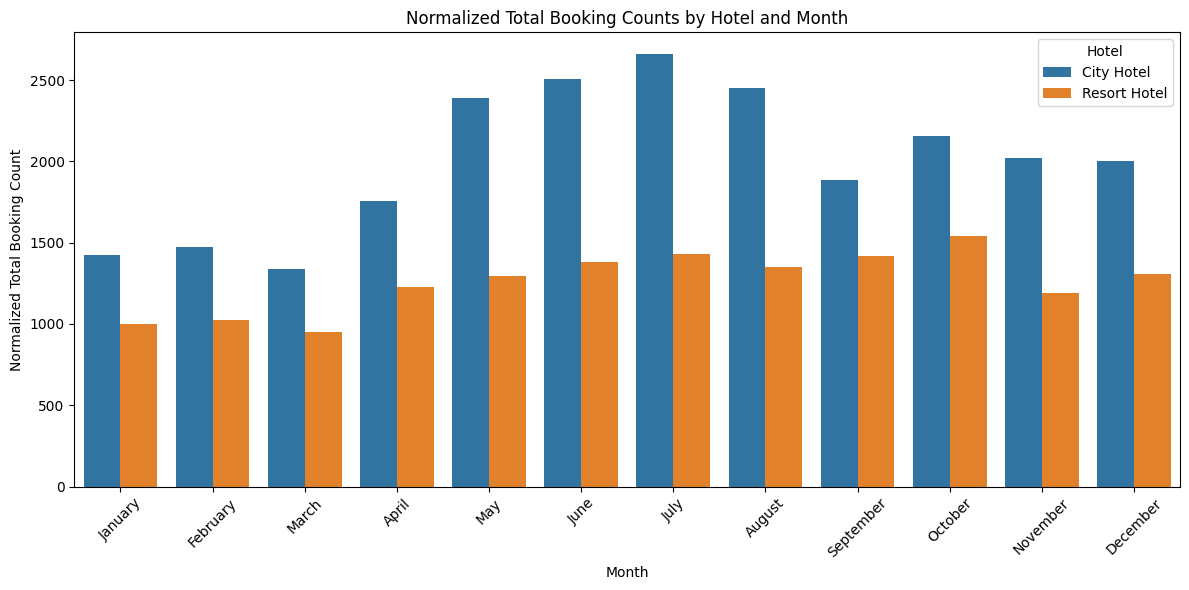

In [ ]:
# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='arrival_date_month', y='avg_total_booking', hue='hotel', data=df_used_group_result, ci=None)

# Customize the plot
plt.title('Normalized Total Booking Counts by Hotel and Month')
plt.xlabel('Month')
plt.ylabel('Normalized Total Booking Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.legend(title='Hotel')
plt.tight_layout()
plt.show()

#Tugas 3

In [ ]:
df_used.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,Total_Guest,stay_duration,arrival_month_num,stay_category
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,0,0,Breakfast,0.0,Direct,Direct,0,0,0,0,No Deposit,0.0,0.0,0,Personal,75.0,0,0,Check-Out,1,1,9,Short Stay
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0,0,Breakfast,0.0,Corporate,Corporate,0,0,0,0,No Deposit,304.0,0.0,0,Personal,75.0,0,0,Check-Out,1,1,9,Short Stay
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0,0,Breakfast,0.0,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,0.0,0,Personal,98.0,0,1,Check-Out,2,2,9,Short Stay
5,Resort Hotel,0,0,2017,September,27,1,0,2,2,0,0,Breakfast,0.0,Direct,Direct,0,0,0,0,No Deposit,0.0,0.0,0,Personal,107.0,0,0,Check-Out,2,2,9,Short Stay
6,Resort Hotel,0,9,2017,September,27,1,0,2,2,0,0,Full Board,0.0,Direct,Direct,0,0,0,0,No Deposit,303.0,0.0,0,Personal,103.0,0,1,Check-Out,2,2,9,Short Stay


In [ ]:
df_used['stay_duration'].max()

69

In [ ]:
df_used.to_csv('dfused.csv', index=False)

In [ ]:
bins = [0, 7, 14, 69]  # Adjust the bin edges as needed

# Define the category labels
labels = ['Short Stay', 'Medium Stay', 'Long Stay']

# Create a new column with the categories
df_used['stay_category'] = pd.cut(df_used['stay_duration'], bins=bins, labels=labels, right=False)

df_used







<ipython-input-193-c24cfc2085c5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_used['stay_category'] = pd.cut(df_used['stay_duration'], bins=bins, labels=labels, right=False)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,Total_Guest,stay_duration,arrival_month_num,stay_category
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,0,0,Breakfast,0.0,Direct,Direct,0,0,0,0,No Deposit,0.0,0.0,0,Personal,75.00,0,0,Check-Out,1,1,9,Short Stay
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0,0,Breakfast,0.0,Corporate,Corporate,0,0,0,0,No Deposit,304.0,0.0,0,Personal,75.00,0,0,Check-Out,1,1,9,Short Stay
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0,0,Breakfast,0.0,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,0.0,0,Personal,98.00,0,1,Check-Out,2,2,9,Short Stay
5,Resort Hotel,0,0,2017,September,27,1,0,2,2,0,0,Breakfast,0.0,Direct,Direct,0,0,0,0,No Deposit,0.0,0.0,0,Personal,107.00,0,0,Check-Out,2,2,9,Short Stay
6,Resort Hotel,0,9,2017,September,27,1,0,2,2,0,0,Full Board,0.0,Direct,Direct,0,0,0,0,No Deposit,303.0,0.0,0,Personal,103.00,0,1,Check-Out,2,2,9,Short Stay
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86124,City Hotel,0,23,2019,October,35,30,2,5,2,0,0,Breakfast,0.0,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,394.0,0.0,0,Personal,96.14,0,0,Check-Out,2,7,10,Medium Stay
86125,City Hotel,0,102,2019,October,35,31,2,5,3,0,0,Breakfast,0.0,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,0.0,0,Personal,225.43,0,2,Check-Out,3,7,10,Medium Stay
86126,City Hotel,0,34,2019,October,35,31,2,5,2,0,0,Breakfast,0.0,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,0.0,0,Personal,157.71,0,4,Check-Out,2,7,10,Medium Stay
86127,City Hotel,0,109,2019,October,35,31,2,5,2,0,0,Breakfast,0.0,Online TA,TA/TO,0,0,0,0,No Deposit,89.0,0.0,0,Personal,104.40,0,0,Check-Out,2,7,10,Medium Stay


In [ ]:
filtered_df_is_canceled = df_used[df_used['is_canceled'] == 1]


In [ ]:
filtered_df_is_canceled

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,Total_Guest,stay_duration,arrival_month_num,stay_category
7,Resort Hotel,1,85,2017,September,27,1,0,3,2,0,0,Breakfast,0.0,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,0.0,0,Personal,82.0,0,1,Canceled,2,3,9,Short Stay
8,Resort Hotel,1,75,2017,September,27,1,0,3,2,0,0,Dinner,0.0,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,15.0,0.0,0,Personal,105.5,0,0,Canceled,2,3,9,Short Stay
9,Resort Hotel,1,23,2017,September,27,1,0,4,2,0,0,Breakfast,0.0,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,0.0,0,Personal,123.0,0,0,Canceled,2,4,9,Short Stay
25,Resort Hotel,1,60,2017,September,27,1,2,5,2,0,0,Breakfast,0.0,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,0.0,0,Personal,107.0,0,2,Canceled,2,7,9,Medium Stay
30,Resort Hotel,1,96,2017,September,27,1,2,8,2,0,0,Breakfast,0.0,Direct,Direct,0,0,0,0,No Deposit,0.0,0.0,0,Personal,108.3,0,2,Canceled,2,10,9,Medium Stay
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77357,City Hotel,1,25,2019,July,18,6,2,1,1,0,0,Breakfast,0.0,Corporate,Corporate,1,0,1,0,No Deposit,0.0,450.0,0,Personal,125.0,0,0,No-Show,1,3,7,Short Stay
79461,City Hotel,1,4,2019,August,23,5,1,0,1,0,0,Breakfast,0.0,Corporate,Corporate,1,0,4,0,No Deposit,0.0,238.0,0,Personal,65.0,0,0,Canceled,1,1,8,Short Stay
79940,City Hotel,1,7,2019,July,22,31,0,1,1,0,0,Breakfast,0.0,Corporate,Corporate,1,0,1,0,No Deposit,0.0,238.0,0,Personal,65.0,0,0,Canceled,1,1,7,Short Stay
79941,City Hotel,1,6,2019,September,29,17,1,0,1,0,0,Breakfast,0.0,Corporate,Corporate,1,1,1,0,No Deposit,0.0,238.0,0,Personal,65.0,0,0,No-Show,1,1,9,Short Stay


In [ ]:
df_compare =df_used.groupby(["stay_category","is_canceled"]).agg({"is_canceled":"count"}).rename(columns={"is_canceled":"book_canceled"}).reset_index()

In [ ]:
df_compare

,stay_category,is_canceled,book_canceled
0,Short Stay,0,53331
1,Short Stay,1,19765
2,Medium Stay,0,7540
3,Medium Stay,1,3526
4,Long Stay,0,809
5,Long Stay,1,406


<ipython-input-235-9abbd845588c>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='stay_category', y='book_canceled', hue='is_canceled', data=df_compare, ci=None)


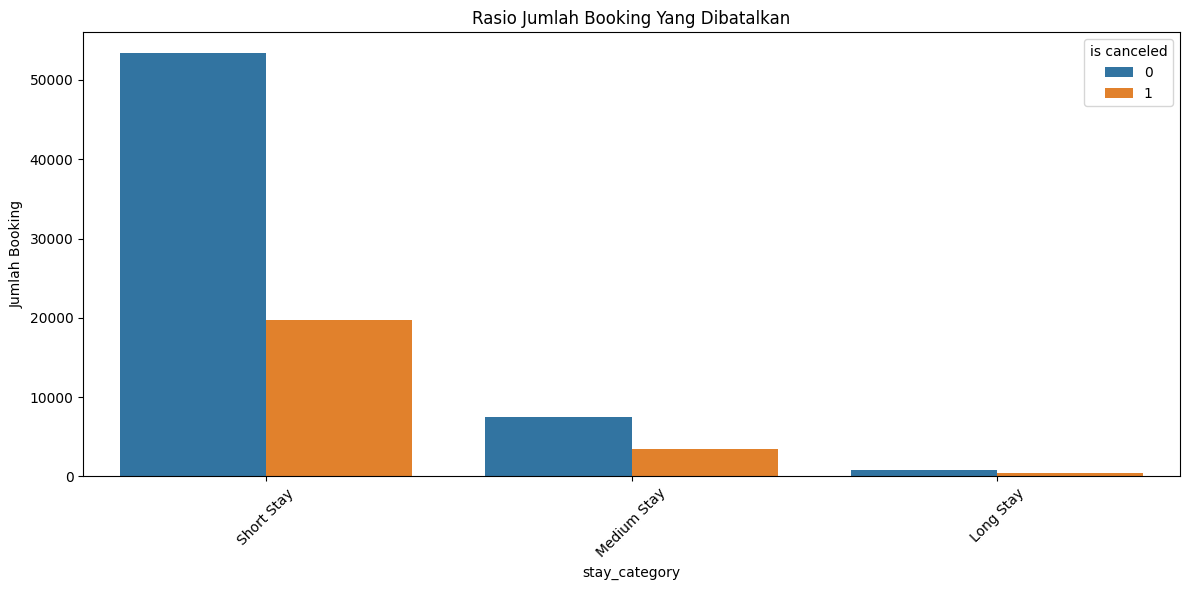

In [ ]:
# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='stay_category', y='book_canceled', hue='is_canceled', data=df_compare, ci=None)

# Customize the plot
plt.title('Rasio Jumlah Booking Yang Dibatalkan')

plt.ylabel('Jumlah Booking')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.legend(title='is canceled')
plt.tight_layout()
plt.show()

#Tugas 4

In [ ]:
bins = [-1, 30, 90, 180, 365, float('inf')]
labels = ['0-30 days', '31-90 days', '91-180 days', '181-365 days', '365+ days']


df_used['lead_time_category'] = pd.cut(df_used['lead_time'], bins=bins, labels=labels)


<ipython-input-224-98fa12030560>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_used['lead_time_category'] = pd.cut(df_used['lead_time'], bins=bins, labels=labels)


In [ ]:
df_used

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,Total_Guest,stay_duration,arrival_month_num,stay_category,lead_time_category
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,0,0,Breakfast,0.0,Direct,Direct,0,0,0,0,No Deposit,0.0,0.0,0,Personal,75.00,0,0,Check-Out,1,1,9,Short Stay,0-30 days
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0,0,Breakfast,0.0,Corporate,Corporate,0,0,0,0,No Deposit,304.0,0.0,0,Personal,75.00,0,0,Check-Out,1,1,9,Short Stay,0-30 days
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0,0,Breakfast,0.0,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,0.0,0,Personal,98.00,0,1,Check-Out,2,2,9,Short Stay,0-30 days
5,Resort Hotel,0,0,2017,September,27,1,0,2,2,0,0,Breakfast,0.0,Direct,Direct,0,0,0,0,No Deposit,0.0,0.0,0,Personal,107.00,0,0,Check-Out,2,2,9,Short Stay,0-30 days
6,Resort Hotel,0,9,2017,September,27,1,0,2,2,0,0,Full Board,0.0,Direct,Direct,0,0,0,0,No Deposit,303.0,0.0,0,Personal,103.00,0,1,Check-Out,2,2,9,Short Stay,0-30 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86124,City Hotel,0,23,2019,October,35,30,2,5,2,0,0,Breakfast,0.0,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,394.0,0.0,0,Personal,96.14,0,0,Check-Out,2,7,10,Medium Stay,0-30 days
86125,City Hotel,0,102,2019,October,35,31,2,5,3,0,0,Breakfast,0.0,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,0.0,0,Personal,225.43,0,2,Check-Out,3,7,10,Medium Stay,91-180 days
86126,City Hotel,0,34,2019,October,35,31,2,5,2,0,0,Breakfast,0.0,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,0.0,0,Personal,157.71,0,4,Check-Out,2,7,10,Medium Stay,31-90 days
86127,City Hotel,0,109,2019,October,35,31,2,5,2,0,0,Breakfast,0.0,Online TA,TA/TO,0,0,0,0,No Deposit,89.0,0.0,0,Personal,104.40,0,0,Check-Out,2,7,10,Medium Stay,91-180 days


In [ ]:
df_compare =df_used.groupby(["hotel","lead_time_category","is_canceled"]).agg({"is_canceled":"count"}).rename(columns={"is_canceled":"book_canceled"}).reset_index()

In [ ]:
df_compare

,hotel,lead_time_category,is_canceled,book_canceled
0,City Hotel,0-30 days,0,16024
1,City Hotel,0-30 days,1,3927
2,City Hotel,31-90 days,0,9887
3,City Hotel,31-90 days,1,4972
4,City Hotel,91-180 days,0,7170
5,City Hotel,91-180 days,1,4166
6,City Hotel,181-365 days,0,3116
7,City Hotel,181-365 days,1,2575
8,City Hotel,365+ days,0,167
9,City Hotel,365+ days,1,187


In [ ]:
df_compare_filter = df_compare[df_compare['is_canceled'] == 1]

In [ ]:
df_compare_filter

,hotel,lead_time_category,is_canceled,book_canceled
1,City Hotel,0-30 days,1,3927
3,City Hotel,31-90 days,1,4972
5,City Hotel,91-180 days,1,4166
7,City Hotel,181-365 days,1,2575
9,City Hotel,365+ days,1,187
11,Resort Hotel,0-30 days,1,1690
13,Resort Hotel,31-90 days,1,2220
15,Resort Hotel,91-180 days,1,2123
17,Resort Hotel,181-365 days,1,1800
19,Resort Hotel,365+ days,1,37


<ipython-input-241-7456e6ab09aa>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='lead_time_category', y='book_canceled', hue='hotel', data=df_compare_filter, ci=None)


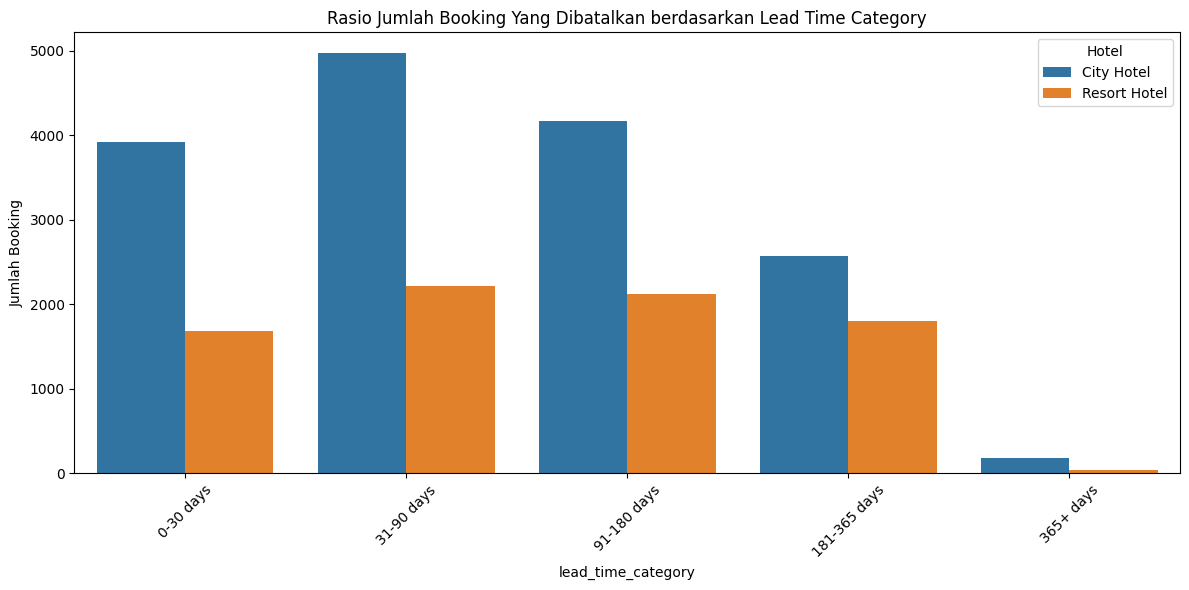

In [ ]:
# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='lead_time_category', y='book_canceled', hue='hotel', data=df_compare_filter, ci=None)

# Customize the plot
plt.title('Rasio Jumlah Booking Yang Dibatalkan berdasarkan Lead Time Category')

plt.ylabel('Jumlah Booking')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.legend(title='Hotel')
plt.tight_layout()
plt.show()